This is a quick notebook which loads all of the nesscary components to compute a limit on epsilon and its uncertainty 

$\epsilon^{lim}(\nu) = \sqrt{\frac{|Z_0| \, \mathrm{P}_\textbf{ant}^{lim}(\nu) \,  \, \varepsilon_0}{\langle \widetilde Q(\nu) A_{e}(\nu)\rangle \, 2 \, \rho_{DM}}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
plt.rcParams["mathtext.fontset"] = "cm"

Text(0, 0.5, 'Watts')

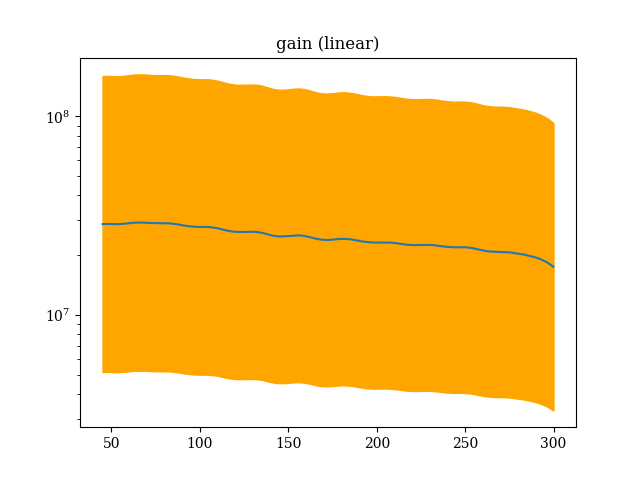

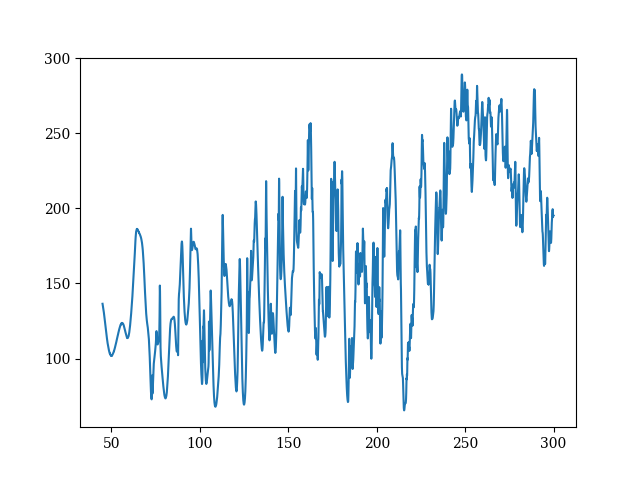

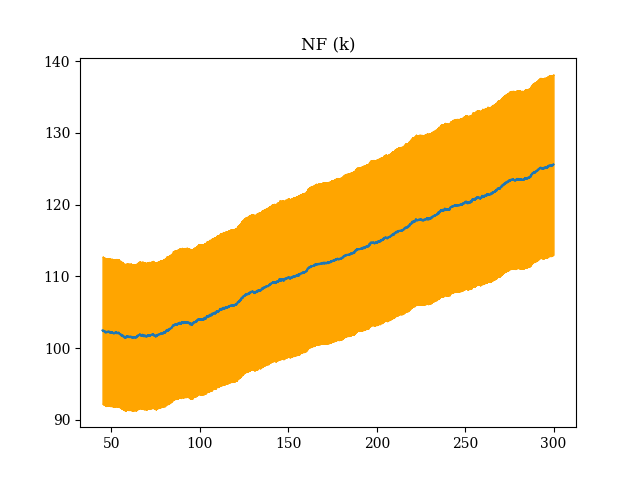

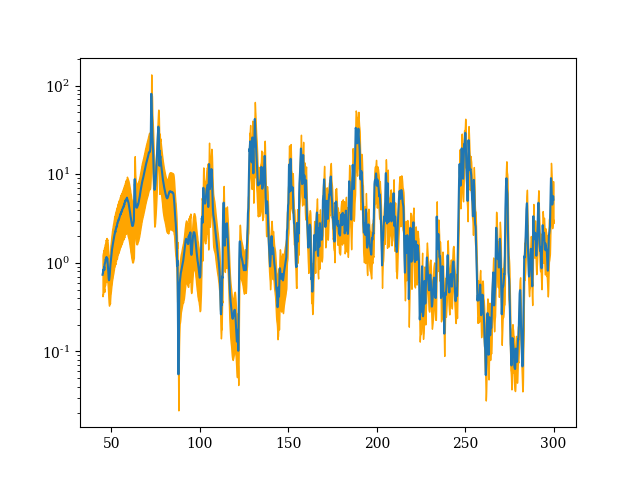

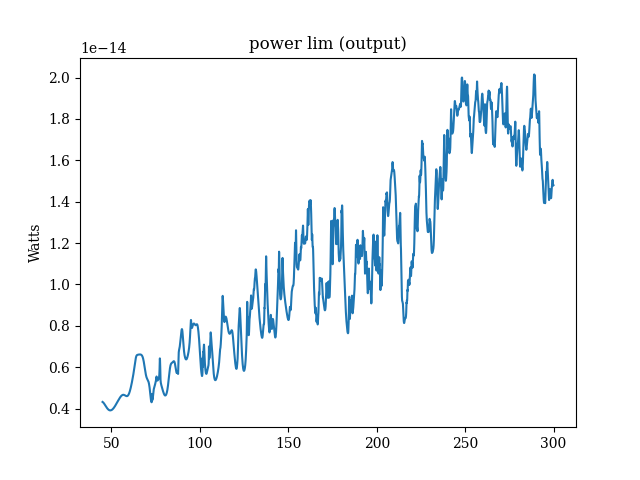

In [2]:
plt.close('all')

rhoDm       = 0.45 #GeV/cc
rhoDm       /= 6242 #convert to j/m^3
Z0          = 377 #ohms
epsilon0    = 8.854e-12 #F/m

k = 1.380649e-23  # Boltzmann constant in J/K
B = 47.7 #bandwidth, Hz/bin


pLimOut     = np.load('data/outputRefLimtWatts_freqsMHz_withMatchedFilter_95pcntConfidence_5pcntFPL_every500Points_3_18_24.npy')
freqs = pLimOut[0]

gain        = np.load('data/run1p4_Gain_dB_freqs_MHz_only40to350MHzValid_yFactor_correctedWithTermFromRun_medfilt1001Bins_3_18_24.npy')
gainInterp  = np.interp(freqs, gain[0], gain[1])
#assume 10% error on gain
gainInterpUpper = gainInterp * (1 + 0.1)
gainInterpLower = gainInterp * (1 - 0.1)

nf          = np.load('data/run1p4_NF_kelvin_freqs_MHz_medFilt1001Bins_3_18_24.npy')
nf_Interp   = np.interp(freqs, nf[0],nf[1])
#assume 10% error on nf
nf_InterpUpper = nf_Interp * (1+0.1)
nf_InterpLower = nf_Interp * (1-0.1)



Q_Ae                    = np.load('data/QAe_avg_mSquared_FreqMHz_errorFromS12_3_18_24.npy')
Q_Ae_interp             = np.interp(freqs, Q_Ae[0], Q_Ae[1]) 
Q_Ae_interp_lowerErr    = np.interp(freqs, Q_Ae[0], Q_Ae[2]) 
Q_Ae_interp_upperErr    = np.interp(freqs, Q_Ae[0], Q_Ae[3]) 

sOut        = np.load('../avgSpecs_gitignore/avgAntSpec_WALL_33p6M_FFTs_11_16_23.npy')
sOutInterp  = np.interp(freqs, np.linspace(0,400,len(sOut)), sOut)

sOutTerm        = np.load('../avgSpecs_gitignore/avgTermSpec_WALL_2p2M_FFTs_11_16_23.npy')
sOutTermInterp  = np.interp(freqs, np.linspace(0,400,len(sOutTerm)), sOutTerm)

noise = np.random.chisquare(200, len(freqs)) *0

dpHandbookMass, dpHandbookLimit = np.loadtxt('data/DarkEfield2_6_6_24.txt', unpack = True)
dpHandbookMassRE, dpHandbookLimitRE = np.loadtxt('data/DarkEfield2Rescale_6_6_24.txt', unpack = True)

plt.close('all')
plt.figure()
plt.title('gain (linear)')
plt.plot(freqs, 10**(gainInterp/10))
plt.fill_between(freqs, 10**(gainInterpLower/10), 10**(gainInterpUpper/10), color = 'orange')
plt.semilogy()


plt.figure()
plt.plot(freqs, (sOutInterp+noise)/10**(gainInterp/10)/47.7/1.38e-23 - nf_Interp)





plt.figure()
plt.title('NF (k)')
plt.plot(freqs, nf_Interp)
plt.fill_between(freqs, nf_InterpLower, nf_InterpUpper, color = 'orange')

plt.figure()
plt.plot(freqs, Q_Ae_interp)
plt.fill_between(freqs, Q_Ae_interp_lowerErr, Q_Ae_interp_upperErr, color = 'orange')
plt.semilogy()

plt.figure()
plt.title('power lim (output)')
plt.plot(freqs, pLimOut[1])
plt.ylabel('Watts')

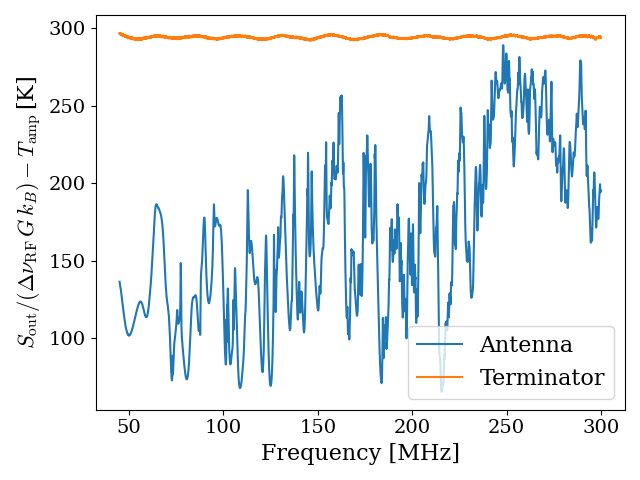

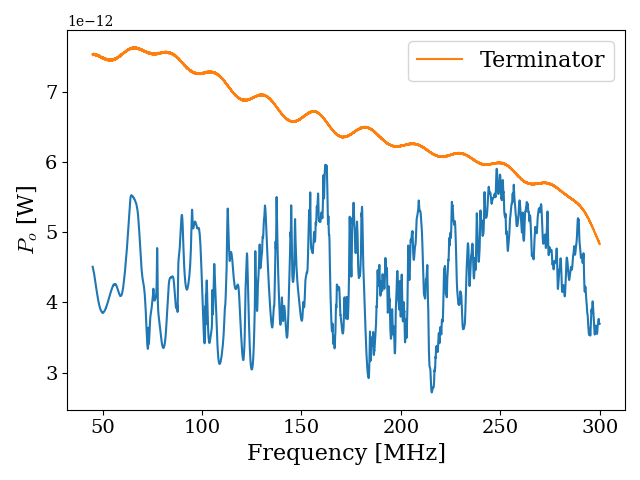

In [6]:
## plots for talk
plt.close('all')


sysTemp = sOutInterp/10**(gainInterp/10)/47.7/1.38e-23 - nf_Interp
noise = np.random.normal(0, sysTemp.mean()/5, len(sysTemp))*0


plt.figure()
#plt.plot(freqs, (sOutInterp+noise)/10**(gainInterp/10)/47.7/1.38e-23 - nf_Interp)
plt.plot(freqs, sysTemp, label = 'Antenna')
plt.plot(freqs, sOutTermInterp/10**(gainInterp/10)/47.7/1.380649e-23 - nf_Interp, label = 'Terminator')
plt.legend(fontsize = 16)
plt.xlabel('Frequency [MHz]', fontsize = 16)
plt.ylabel(r'$S_\mathrm{out}/(\Delta \nu_\mathrm{RF}\,G \, k_B)- T_\mathrm{amp}\,$[K]', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()


plt.figure()
plt.plot(freqs, sOutInterp)
plt.plot(freqs, sOutTermInterp, label = 'Terminator')
plt.legend(fontsize = 16)
plt.xlabel('Frequency [MHz]', fontsize = 16)
plt.ylabel(r'$P_o$ [W]', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()


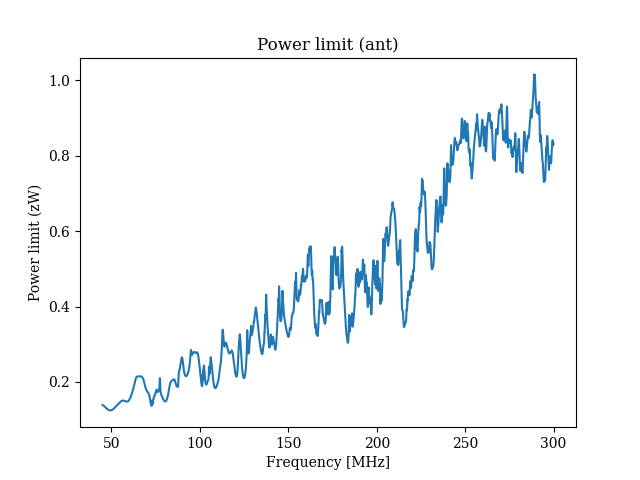

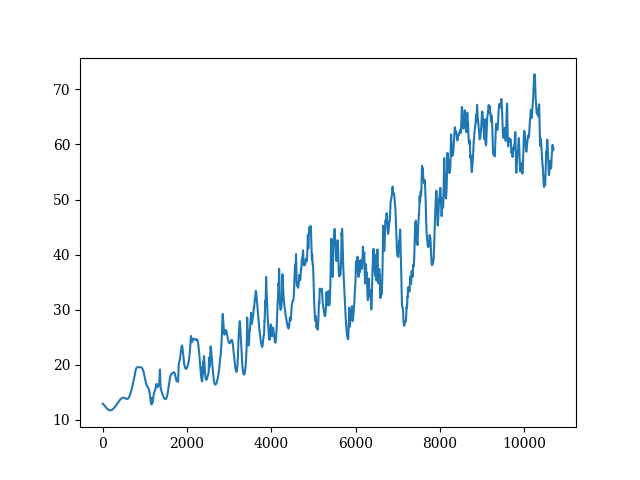

In [4]:
plt.close('all')
pLimAnt = (pLimOut[1]/(10**(gainInterp/10)))
pLimAnt2 = (pLimOut[1]/(10**(gainInterp/10))) - ((k*1.727e-4)*nf_Interp*47.7)
pLimAnt3 = np.sqrt((pLimOut[1]/(10**(gainInterp/10)))**2 - ((k*1.727e-4)*nf_Interp*47.7)**2)
pLimAntUpper = (pLimOut[1]/(10**(gainInterpUpper/10)))
pLimAntLower = (pLimOut[1]/(10**(gainInterpLower/10)))


plt.figure()
plt.title('Power limit (ant)')
#plt.plot(freqs, pLimAnt/1e-21)
#plt.plot(freqs, (k*1.727e-4*nf_Interp)/1e-21 *47.7*22)
plt.plot(freqs, pLimAnt2/1e-21)
#plt.plot(freqs, pLimAnt3/1e-21)
#plt.plot(freqs, (pLimAnt+ nf_Interp*k/47.7)/1e-21)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power limit (zW)')
#plt.semilogy()

plt.figure()
plt.plot(pLimOut[1]/(10**(gainInterp/10))/((k*1.727e-4)*nf_Interp*47.7))


[]

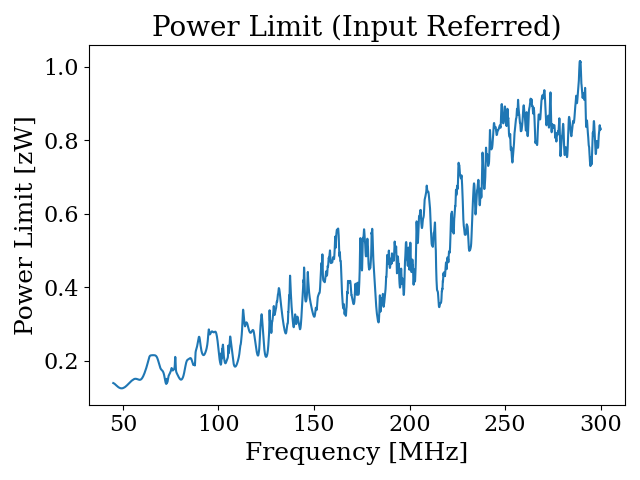

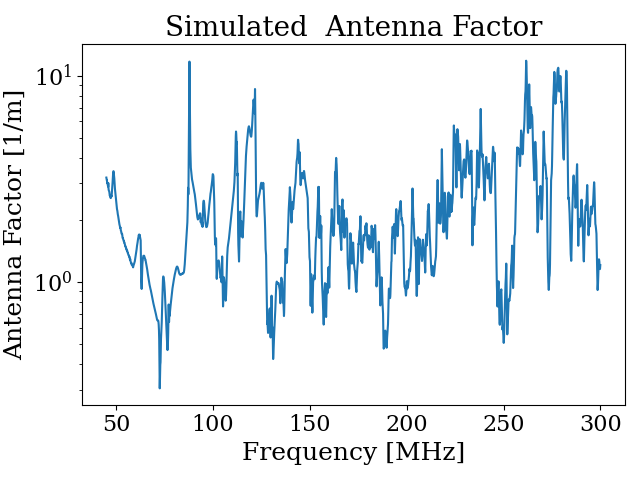

In [5]:
#for hepcat slides
#plt.style.use('dark_background')
plt.figure()
plt.title('Power Limit (Input Referred)', fontsize = 20)
plt.plot(freqs, pLimAnt2/1e-21)
plt.xlabel('Frequency [MHz]', fontsize = 18)
plt.ylabel('Power Limit [zW]', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()
#plt.semilogy()

plt.figure()
plt.title('Simulated  Antenna Factor', fontsize = 20)
plt.plot(freqs, np.sqrt((377/50)*(1/Q_Ae_interp)))
plt.xlabel('Frequency [MHz]', fontsize = 18)
plt.ylabel('Antenna Factor [1/m]', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.semilogy()

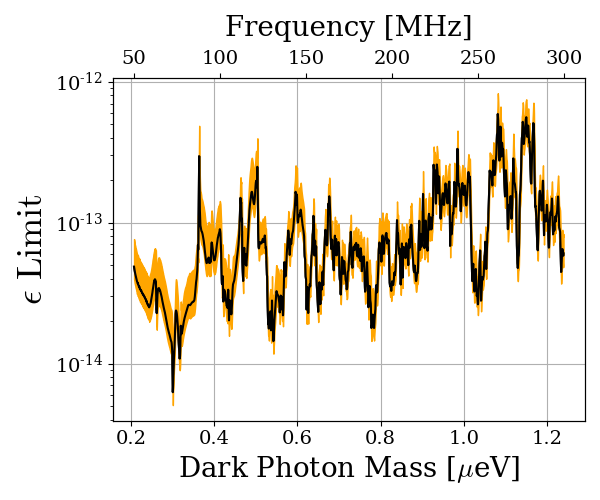

In [36]:
h_eVs = 4.135667696e-15  # Planck's constant in eV.s

startIdx = 209
stopIdx  = -1

epsLim = np.sqrt((Z0 * pLimAnt2 * epsilon0) / (Q_Ae_interp * 2 * rhoDm)) 

epsLimUpper = np.sqrt((Z0 * pLimAnt * epsilon0) / (Q_Ae_interp_upperErr * 2 * rhoDm)) 
epsLimLower = np.sqrt((Z0 * pLimAnt * epsilon0) / (Q_Ae_interp_lowerErr * 2 * rhoDm)) 



plt.close('all')
'''
plt.figure(figsize=(6, 5))
plt.plot(freqs, epsLim, color = 'black')
plt.fill_between(freqs, epsLimLower, epsLimUpper, color = 'orange')
plt.semilogy()
plt.xlabel('Frequency [MHz]', fontsize=20)
plt.ylabel(r'$\mathrm{Limit} \,\, {\epsilon}$', fontsize=26)
plt.tick_params('y',labelrotation=0,labelsize = 14)
plt.tick_params('x',labelrotation=0,labelsize = 14)
plt.tight_layout()
plt.grid()'''


fig, ax1 = plt.subplots(figsize = (6,5))
# Frequency axis (MHz) - top

ax1.set_xlabel(r'Dark Photon Mass [$\mu$eV]', fontsize = 20)  # Label for the eV axis
ax1.set_ylabel(r'${\epsilon} \,\,\mathrm{Limit}  $', fontsize=26)

'''new_tick_locations = np.array([50,70, 150,280])
ax1.set_xticks(new_tick_locations)
ax1.set_xticklabels(np.round(new_tick_locations*1e6*h_eVs/1e-6,2))'''
ax1.plot((freqs*1e6*h_eVs*1e6)[startIdx:stopIdx], epsLim[startIdx:stopIdx], color = 'black')
ax1.tick_params('x',labelsize = 14)
ax1.tick_params('y',labelsize = 14)
ax1.grid()


ax2 = ax1.twiny()  # instantiate a second axes that shares the same y-axis
ax2.set_xlabel('Frequency [MHz]', labelpad = 10,fontsize = 20)
ax2.plot(freqs[startIdx:stopIdx], epsLim[startIdx:stopIdx], color = 'black')
ax2.fill_between(freqs[startIdx:stopIdx], epsLimLower[startIdx:stopIdx], epsLimUpper[startIdx:stopIdx], color = 'orange')
ax2.tick_params('x',labelsize = 14)
ax2.semilogy()



fig.tight_layout()

#### save limit 
####  WILL OVERWRITE  ####
if 0:
    epsilonLimit = epsLim
    epsilonLimitFreqs = freqs
    print(len(epsilonLimit))
    epsilonLimitArr = np.stack([epsilonLimitFreqs, epsilonLimit], axis = 0)
    plt.figure()
    #plt.plot(powerOutLimMatchedFilterFreqs, powerOutLimMatchedFilter)
    plt.plot(epsilonLimitArr[0], epsilonLimitArr[1])

    np.save('data/epsilonLimit_freqsMHz_withMatchedFilter_95pcntConfidence_5pcntFPL_every500Points_3_25_24', epsilonLimitArr)


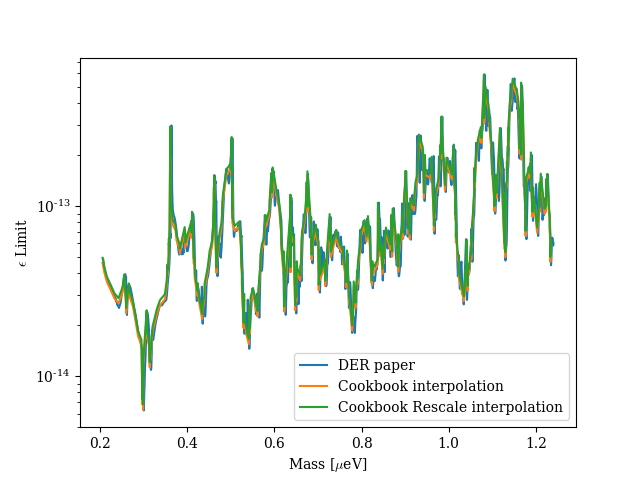

In [41]:
plt.figure() 
plt.plot((freqs*1e6*h_eVs*1e6)[startIdx:stopIdx], epsLim[startIdx:stopIdx], label = 'DER paper')
plt.plot(dpHandbookMass[1:-1]*1e6, dpHandbookLimit[1:-1],  label = 'Cookbook interpolation')  
plt.plot(dpHandbookMassRE[1:-1]*1e6, dpHandbookLimitRE[1:-1],label = 'Cookbook Rescale interpolation')  
plt.semilogy() 
plt.legend()
plt.xlabel(r'Mass [$\mu$eV]')
plt.ylabel(r'$\epsilon$ Limit' )
plt.show() 


In [38]:
from decimal import Decimal
FOM = 1e6*np.trapz(1/(epsLim[startIdx:stopIdx]*freqs[startIdx:stopIdx]),freqs[startIdx:stopIdx])/(9**(0.25))
print('FOM= '+ str(f'{Decimal(str(FOM)):.2E}')+ ' MHz/epsilon for one day')

FOM= 2.60E+19 MHz/epsilon for one day


0.45